In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import requests
import json
import numpy as np


The following code attempts to find any correlation between total cases per million as of of 31/12/2022 and average stringency index of each country (177 in total). The stringency index provided by OWID is a number ranging from 0-100 that gives an indication of the strictness of
government mandates from 9 factors - school closures; workplace closures; cancellation of public events; restrictions on public gatherings; closures of public transport; stay-at-home requirements; public information campaigns; restrictions on internal movements; and international travel controls.

In [2]:
# The iso_code_df contains two letter codes for all countries that will
# be used when getting incomeLevel from the worldbank api.

csv_file = Path("cleaned_data/string_df.csv")
string_df = pd.read_csv(csv_file).dropna()

csv_file = Path("cleaned_data/cleaned_data.csv")
data_df = pd.read_csv(csv_file)



In [3]:
# function used to plot data and perform linear regression
def linregress(var1,var2,income_list,outliers,png_name):
    for i in income_list:
        # Collecting rows from data_df for each income level
        income_data = data_df.loc[(data_df['income status']==i),:]
        data1 = income_data[var1]
        data2 = income_data[var2]
        # Plotting each income level
        plt.scatter(data1,data2)
    if len(outliers)>0:
        # Getting rows of outlier
        outliers_df = data_df.loc[(data_df['Country'].isin(outliers))]
        outlier_data1 = outliers_df[var1]
        outlier_data2 = outliers_df[var2]
        # Plotting outliers
        plt.scatter(outlier_data1,outlier_data2)
        income_list.append('Outliers')
    # Getting full data set to do linear regression on
    full_df = data_df.loc[data_df['income status'].isin(income_list)]
    (slope, intercept, r, p, std_err) = stats.linregress(full_df[var1],full_df[var2])
    fit = [i*slope + intercept for i in full_df[var1]]
    plt.plot(full_df[var1],fit,color="red")
    plt.legend(income_list,bbox_to_anchor=(1, 0.7))
    d1=data_df.columns.get_loc(var1)
    d2=data_df.columns.get_loc(var2)
    for i in range(0,len(outliers)):
        out = outliers[i]
        out_data = data_df.loc[(data_df['Country'])==out,:]
        plt.text(out_data.iloc[0,d1]*(1-0.05),out_data.iloc[0,d2]*(1+0.1),out)
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.title(f"{var1} vs {var2} ({len(full_df[var1])} Countries)")
    plt.figtext(0.92, 0.35, f"r-value is: {round(r,3)}")
    plt.show() 
    

In [4]:
# function used to determine outliers
def outliers(income_level,data_set):
    data = data_df.loc[(data_df['income status']==income_level),:]
    quartiles = data[data_set].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = []
    column=data_df.columns.get_loc(data_set)
    for i in data['Country']:
        country_data = data.loc[(data['Country']==i),:]
        if (country_data.iloc[0,column]<lower_bound)|(country_data.iloc[0,column]>upper_bound):
            outliers.append(i)
    print(f"outliers are: {outliers}")


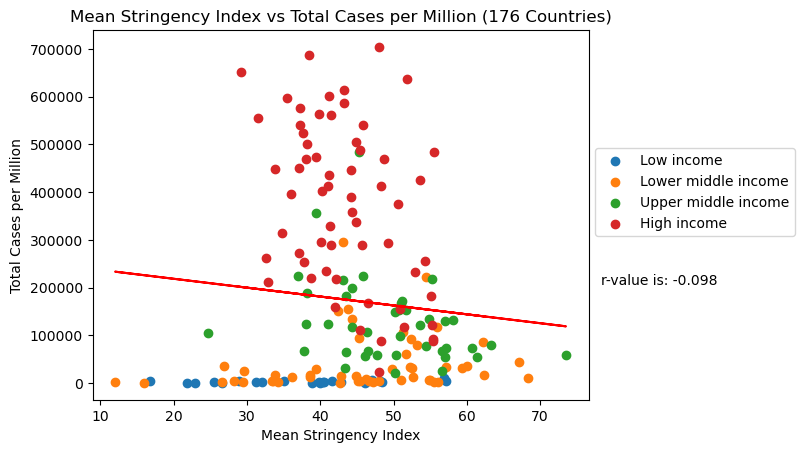

In [5]:

income_list = ['Low income','Lower middle income','Upper middle income','High income']
linregress('Mean Stringency Index','Total Cases per Million',income_list,[],'')


In [6]:
# Determining outliers for Mean Stringency index according to income level
outliers('Upper middle income','Mean Stringency Index')
outliers('High income','Mean Stringency Index')


outliers are: ['Belarus', 'China']
outliers are: []


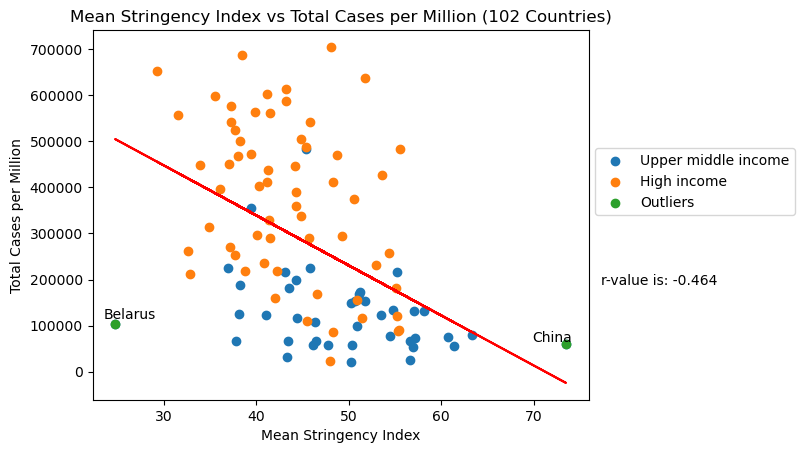

In [7]:
# Plotting points for Upper middle income and high income countries
Outliers = ['Belarus','China']
income_list = ['Upper middle income','High income']
linregress('Mean Stringency Index','Total Cases per Million',income_list,Outliers,'stringency_vs_cases')


This section attempts to determine any correlation between the facemask index found on OWID
and total number of cases per million as of 31/12/2022. 
The facemask index ranges from 0-4 where, 0 - No Policy, 1 - Recommended, 2 - Required in some public areas,
3 - Required in all public spaces, 4 - Required outside-the-home at all times.

In [8]:
# Determining outliers for Mean Facemask index according to income level
outliers('Upper middle income','Mean Facemask Index')
outliers('High income','Mean Facemask Index')


outliers are: ['Belarus', 'Tonga']
outliers are: ['Sweden']


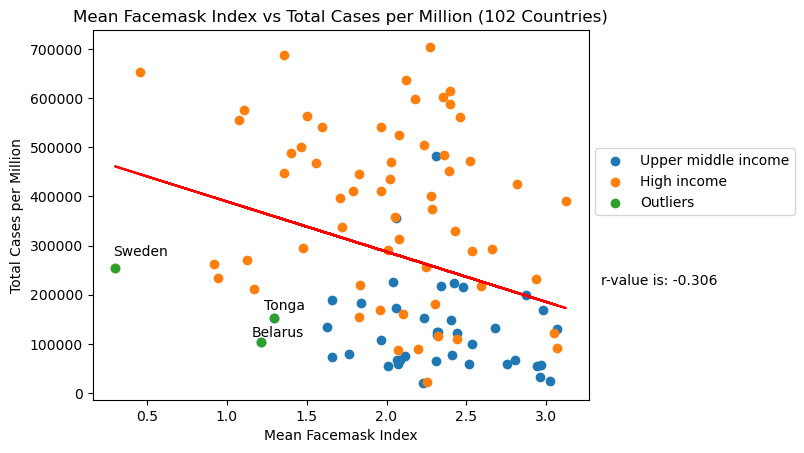

In [9]:
Outliers = ['Belarus','Tonga','Sweden']
income_list = ['Upper middle income','High income']
linregress('Mean Facemask Index','Total Cases per Million',income_list,Outliers,'')



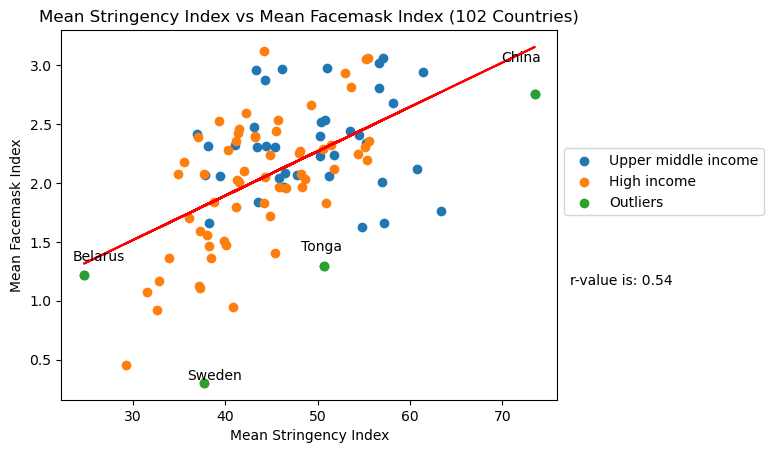

In [10]:

Outliers = ['Belarus','Tonga','Sweden','China']
income_list = ['Upper middle income','High income']
linregress('Mean Stringency Index','Mean Facemask Index',income_list,Outliers,'stringency_mask_ind')
